In [32]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT  
cast(clients.consult_date as date) as "Start Date", 
expert_requests.date_requested as "End Date",
cast(expert_requests.date_requested as date) - cast(clients.consult_date as date) as "Period" 
FROM 
clients 
INNER JOIN expert_requests
ON clients.id = expert_requests.client
WHERE clients.status = 'Active'
AND clients.consult_date IS NOT NULL)

SELECT original."Period"
from original
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

    Period
0       62
1       64
2       22
3       59
4      175
5       62
6       90
7       43
8       24
9      184
10      51
11      59
12      17
13      43
14      39
15      24
16     168
17     156
18     168
19      13
20      37
21      37
22      45
23      60
24      55
25     112
26     175
27      25
28      20
29      63
30      51


    Period
0       62
1       64
2       22
3       59
4      175
5       62
6       90
7       43
8       24
9      184
10      51
11      59
12      17
13      43
14      39
15      24
16     168
17     156
18     168
19      13
20      37
21      37
22      45
23      60
24      55
25     112
26     175
27      25
28      20
29      63
30      51


C:\Users\Nik Harith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


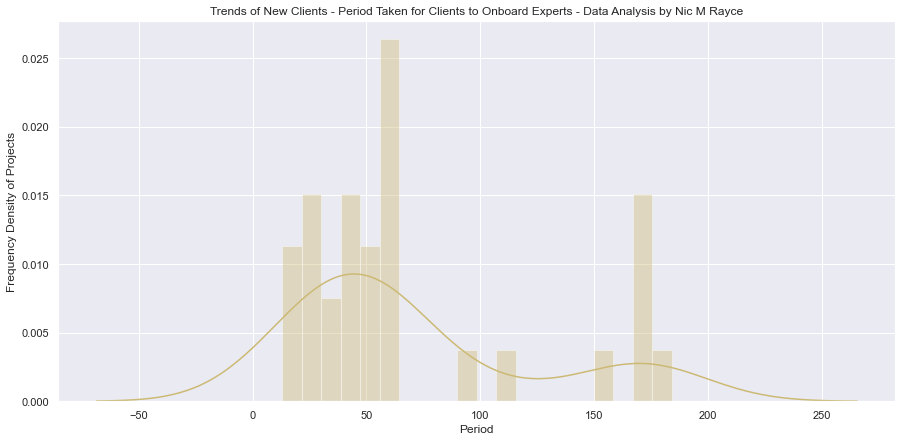

In [40]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT  
cast(clients.consult_date as date) as "Start Date", 
expert_requests.date_requested as "End Date",
cast(expert_requests.date_requested as date) - cast(clients.consult_date as date) as "Period" 
FROM 
clients 
INNER JOIN expert_requests
ON clients.id = expert_requests.client
WHERE clients.status = 'Active'
AND clients.consult_date IS NOT NULL)

SELECT original."Period"
from original
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

import seaborn as sns, numpy as np
plt.figure(figsize=(15,7))
plt.xlabel('Period')
plt.ylabel('Frequency Density of Projects') 
plt.title('Trends of New Clients - Period Taken for Clients to Onboard Experts - Data Analysis by Nic M Rayce')
sns.set_theme(); np.random.seed(0)
x = df5['Period']
ax = sns.distplot(x, color="y", bins=20)

   10-Day Bucket  Number of Projects
0              2                   3
1              3                   4
2              4                   3
3              5                   3
4              6                   6
5              7                   4
6              9                   1
7             12                   1
8             13                   6


<BarContainer object of 9 artists>

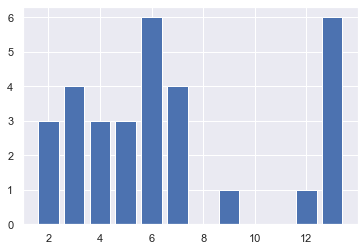

In [46]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT  
cast(clients.consult_date as date) as "Start Date", 
expert_requests.date_requested as "End Date",
cast(expert_requests.date_requested as date) - cast(clients.consult_date as date) as "Period" 
FROM 
clients 
INNER JOIN expert_requests
ON clients.id = expert_requests.client
WHERE clients.status = 'Active'
AND clients.consult_date IS NOT NULL)

SELECT cast(case when original."Period" >= 0 and original."Period" <= 10    then '  1'
            when original."Period" > 10 and original."Period" <= 20   then ' 2'
            when original."Period" > 20 and original."Period" <= 30  then ' 3'
            when original."Period" > 30 and original."Period" <= 40   then ' 4'
            when original."Period" > 40 and original."Period" <= 50  then ' 5'
            when original."Period" > 50 and original."Period" <= 60  then ' 6'
            when original."Period" > 60 and original."Period" <= 70    then ' 7'
            when original."Period" > 70 and original."Period" <= 80   then ' 8'
            when original."Period" > 80 and original."Period" <= 90  then ' 9'
            when original."Period" > 90 and original."Period" <= 100   then ' 10'
            when original."Period" > 100 and original."Period" <= 110  then ' 11'
            when original."Period" > 110 and original."Period" <= 120  then ' 12'
            else '13' end as integer) as "10-Day Bucket",
            count(*) as "Number of Projects"
            FROM original
            GROUP BY 1
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

x_data = df5['10-Day Bucket']
y_data = df5['Number of Projects']
plt.bar(x_data, y_data)

In [7]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date))
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)


    Percentage of Active Experts (%)                date_trunc
0                           0.000000 2022-06-01 00:00:00+00:00
1                           6.451613 2022-05-01 00:00:00+00:00
2                          16.393443 2022-04-01 00:00:00+00:00
3                           8.000000 2022-03-01 00:00:00+00:00
4                           7.692308 2022-02-01 00:00:00+00:00
5                          10.526316 2022-01-01 00:00:00+00:00
6                           2.380952 2021-12-01 00:00:00+00:00
7                          10.526316 2021-11-01 00:00:00+00:00
8                          23.076923 2021-10-01 00:00:00+00:00
9                          12.195122 2021-09-01 00:00:00+00:00
10                         27.500000 2021-08-01 00:00:00+00:00
11                         17.000000 2021-07-01 00:00:00+00:00
12                         53.333333 2021-06-01 00:00:00+00:00
13                         58.333333 2021-05-01 00:00:00+00:00
14                         62.500000 2021-04-01 00:00:0

    Percentage of Active Experts (%)         Registration Date
0                           0.000000 2022-06-01 00:00:00+00:00
1                           6.451613 2022-05-01 00:00:00+00:00
2                          16.393443 2022-04-01 00:00:00+00:00
3                           8.000000 2022-03-01 00:00:00+00:00
4                           7.692308 2022-02-01 00:00:00+00:00
5                          10.526316 2022-01-01 00:00:00+00:00
6                           2.380952 2021-12-01 00:00:00+00:00
7                          10.526316 2021-11-01 00:00:00+00:00
8                          23.076923 2021-10-01 00:00:00+00:00
9                          12.195122 2021-09-01 00:00:00+00:00
10                         27.500000 2021-08-01 00:00:00+00:00
11                         17.000000 2021-07-01 00:00:00+00:00
12                         53.333333 2021-06-01 00:00:00+00:00
13                         58.333333 2021-05-01 00:00:00+00:00
14                         62.500000 2021-04-01 00:00:0

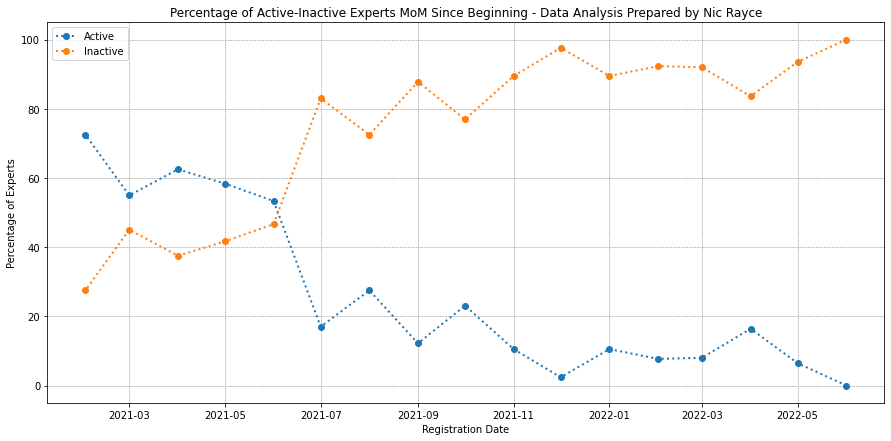

In [10]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts (%)" , date_trunc('month', cast("source"."Date" as date)) as "Registration Date"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Inactive Experts (%)" , date_trunc('month', cast("source"."Date" as date)) as "Registration Date"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

# Define Data
xdata1=df5['Registration Date']
ydata1=df5['Percentage of Active Experts (%)']
xdata2=df6['Registration Date']
ydata2=df6['Percentage of Inactive Experts (%)']
    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active', 'Inactive'])
plt.title("Percentage of Active-Inactive Experts MoM Since Beginning - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
